In [1]:
import sed
import importlib
importlib.reload(sed)
from scipy import integrate
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
import constants as const

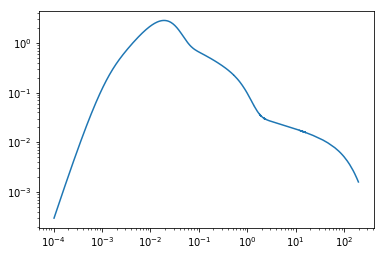

In [2]:
xspec = np.loadtxt("/home/arnau/sed.txt")
plt.loglog(xspec[:,0], xspec[:,1])
#plt.xlim(1e-3, 100)
#plt.ylim(4e-3, 0.3)

In [3]:
sed_test = sed.SED(M=1e8, mdot = 0.5)

In [5]:
flux = integrate.trapz( y = xspec[:,1] / xspec[:,0], x = xspec[:,0])

(0.00028364844778477785, 5.6729689556955565)

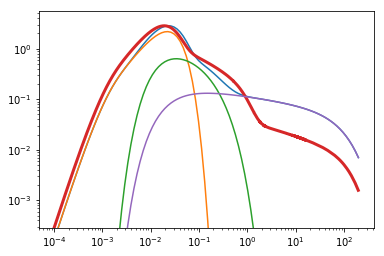

In [17]:
total_sed = sed_test.total_sed_energy

norm_factor = np.max(xspec[:,1]) / np.max(total_sed)   

corona_sed = sed_test.corona_sed_energy

disc_sed = sed_test.disc_sed_energy

warm_sed = sed_test.warm_sed_energy

total_sed = total_sed

plt.loglog(sed_test.energy_range, total_sed * norm_factor)
plt.loglog(sed_test.energy_range, disc_sed * norm_factor)
plt.loglog(sed_test.energy_range, warm_sed * norm_factor)
plt.loglog(xspec[:,0], xspec[:,1], linewidth = 3)
plt.loglog(sed_test.energy_range, corona_sed * norm_factor)
plt.ylim(np.max(total_sed * norm_factor)/10000, 2*np.max(total_sed * norm_factor))
#plt.ylim(6e-4, 0.3)
#plt.xlim(1e-3, 100)

In [11]:
(170000 * const.k_B * u.erg).to(u.keV)

<Quantity 0.01464946 keV>

In [12]:
sed.convert_units(sed_test.disc_peak_frequency * u.Hz, u.keV)


0.02264281417568533

In [13]:
sed_test.corona_luminosity / sed_test.eddington_luminosity

0.03584564827340408

In [14]:
asd = integrate.trapz(y=sed_test.corona_sed_freq / sed_test.freq_range, x = sed_test.freq_range)

In [15]:
asd / sed_test.eddington_luminosity

0.029759591534827712

In [16]:
spec_lumin = []
for nu in sed_test.freq_range:
    spec_lumin.append(sed_test.corona_spectral_luminosity(nu) + sed_test.disc_spectral_luminosity(nu) + sed_test.warm_spectral_luminosity(nu))

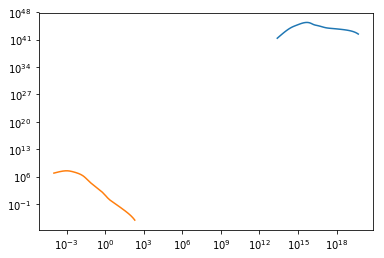

In [302]:
plt.loglog(sed_test.freq_range, sed_test.freq_range * spec_lumin)
plt.loglog(xspec[:,0], xspec[:,1])